In [1]:
import scipy.io
import pandas
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import auc
from numpy import trapz
sns.set()
#print(mat)

In [2]:
mat1=scipy.io.loadmat('BatteryAgingARC_45_46_47_48/B0045.mat')["B0045"][0][0][0][0]#2v
mat2=scipy.io.loadmat('BatteryAgingARC_45_46_47_48/B0046.mat')["B0046"][0][0][0][0]#2.2v
mat3=scipy.io.loadmat('BatteryAgingARC_45_46_47_48/B0047.mat')["B0047"][0][0][0][0]#2.5v
mat4=scipy.io.loadmat('BatteryAgingARC_45_46_47_48/B0048.mat')["B0048"][0][0][0][0]#2.7v
m=np.concatenate((mat1,mat2,mat3,mat4))
m.shape



(736,)

In [3]:
#type(mat)

In [4]:
def build(mess):
    discharge, charge, impedance = {}, {}, {}

    for i, element in enumerate(mess):

        step = element[0][0]

        if step == 'discharge':
            discharge[str(i)] = {}
            discharge[str(i)]["amb_temp"] = str(element[1][0][0])
            year = int(element[2][0][0])
            month = int(element[2][0][1])
            day = int(element[2][0][2])
            hour = int(element[2][0][3])
            minute = int(element[2][0][4])
            second = int(element[2][0][5])
            millisecond = int((second % 1)*1000)
            date_time = datetime.datetime(year, month, day, hour, minute, second, millisecond)        

            discharge[str(i)]["date_time"] = date_time.strftime("%d %b %Y, %H:%M:%S")

            data = element[3]
            discharge[str(i)]["time_min"] = (data[0][0][5][0]/60).tolist()
            discharge[str(i)]["time_sec"] = data[0][0][5][0].tolist()
            discharge[str(i)]["time_taken"] = discharge[str(i)]["time_min"][len(discharge[str(i)]["time_min"])-1]-discharge[str(i)]["time_min"][0]
            discharge[str(i)]["temp_battery"] = data[0][0][2][0].tolist()
            discharge[str(i)]["voltage_load"] = data[0][0][4][0].tolist()
            discharge[str(i)]["voltage_battery"] = data[0][0][0][0].tolist()
            discharge[str(i)]["current_battery"] = data[0][0][1][0].tolist()
            
            discharge[str(i)]["current_load"] = data[0][0][3][0].tolist()
            
            discharge[str(i)]["capacity"] = data[0][0][6][0][0]
            #val=discharge[str(i)]["capacity"]
            discharge[str(i)]["deltaV"] = abs(4.2-discharge[str(i)]["voltage_battery"][1])/np.abs(discharge[str(i)]["current_battery"][1])
            #print(deltaV)
            discharge[str(i)]["auc"]= trapz((data[0][0][5][0]/3600).tolist(),data[0][0][0][0].tolist())
            
    

        if step == 'charge':
            charge[str(i)] = {}
            charge[str(i)]["amb_temp"] = str(element[1][0][0])
            year = int(element[2][0][0])
            month = int(element[2][0][1])
            day = int(element[2][0][2])
            hour = int(element[2][0][3])
            minute = int(element[2][0][4])
            second = int(element[2][0][5])
            millisecond = int((second % 1)*1000)
            date_time = datetime.datetime(year, month, day, hour, minute, second, millisecond)        

            charge[str(i)]["date_time"] = date_time.strftime("%d %b %Y, %H:%M:%S")

            data = element[3]

            charge[str(i)]["voltage_battery"] = data[0][0][0][0].tolist()
            charge[str(i)]["current_battery"] = data[0][0][1][0].tolist()
            charge[str(i)]["temp_battery"] = data[0][0][2][0].tolist()
            charge[str(i)]["current_load"] = data[0][0][3][0].tolist()
            charge[str(i)]["voltage_load"] = data[0][0][4][0].tolist()
            charge[str(i)]["time_min"] = (data[0][0][5][0]/60).tolist()
            charge[str(i)]["time_sec"] = (data[0][0][5][0]).tolist()
            charge[str(i)]["auc"]= auc((data[0][0][5][0]/3600).tolist(),data[0][0][0][0].tolist())
            charge[str(i)]["time_taken"] = charge[str(i)]["time_min"][len(charge[str(i)]["time_min"])-1]-charge[str(i)]["time_min"][0]

        if step == 'impedance':
            impedance[str(i)] = {}
            impedance[str(i)]["amb_temp"] = str(element[1][0][0])
            year = int(element[2][0][0])
            month = int(element[2][0][1])
            day = int(element[2][0][2])
            hour = int(element[2][0][3])
            minute = int(element[2][0][4])
            second = int(element[2][0][5])
            millisecond = int((second % 1)*1000)
            date_time = datetime.datetime(year, month, day, hour, minute, second, millisecond)        

            impedance[str(i)]["date_time"] = date_time.strftime("%d %b %Y, %H:%M:%S")

            data = element[3]

            impedance[str(i)]["sense_current"] = {}
            impedance[str(i)]["battery_current"] = {}
            impedance[str(i)]["current_ratio"] = {}
            impedance[str(i)]["battery_impedance"] = {}
            impedance[str(i)]["rectified_impedance"] = {}

            impedance[str(i)]["sense_current"]["real"] = np.real(data[0][0][0][0]).tolist()
            impedance[str(i)]["sense_current"]["imag"] = np.imag(data[0][0][0][0]).tolist()

            impedance[str(i)]["battery_current"]["real"] = np.real(data[0][0][1][0]).tolist()
            impedance[str(i)]["battery_current"]["imag"] = np.imag(data[0][0][1][0]).tolist()

            impedance[str(i)]["current_ratio"]["real"] = np.real(data[0][0][2][0]).tolist()
            impedance[str(i)]["current_ratio"]["imag"] = np.imag(data[0][0][2][0]).tolist()

            impedance[str(i)]["battery_impedance"]["real"] = np.real(data[0][0][3]).tolist()
            impedance[str(i)]["battery_impedance"]["imag"] = np.imag(data[0][0][3]).tolist()

            impedance[str(i)]["rectified_impedance"]["real"] = np.real(data[0][0][4]).tolist()
            impedance[str(i)]["rectified_impedance"]["imag"] = np.imag(data[0][0][4]).tolist()

            impedance[str(i)]["re"] = float(data[0][0][5][0][0])
            impedance[str(i)]["rct"] = float(data[0][0][6][0][0])
            
    return discharge, charge, impedance

In [5]:
discharge, charge, impedance=build(mat2)
#discharge

In [6]:
discharge = pd.DataFrame(discharge).T
impedance = pd.DataFrame(impedance).T
charge = pd.DataFrame(charge).T
print(discharge.shape,charge.shape)
discharge
#discharge.tail(10)
#charge['time_taken']
index=[i for i in range(1,73,1)]
#index=index+index+index+index
print(index)
discharge['cycle']=index
discharge.set_index(['cycle'])
charge['cycle']=index
charge.set_index(['cycle'])
discharge.head(20)

(72, 13) (72, 11)
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]


,amb_temp,date_time,time_min,time_sec,time_taken,temp_battery,voltage_load,voltage_battery,current_battery,current_load,capacity,deltaV,auc,cycle
0,4,"21 Jul 2010, 15:00:35","[0.0, 0.156, 0.3880166666666666, 0.60676666666...","[0.0, 9.36, 23.281, 36.406, 49.625, 62.813, 75...",107.269017,"[6.398455346375354, 6.417595235420346, 6.43201...","[0.0, 4.253, 3.568, 3.544, 3.528, 3.514, 3.501...","[4.237702541731068, 4.23781853684158, 4.036295...","[-0.0033574658677139302, -0.002134930952066408...","[0.0004, 0.0004, 0.9988, 0.999, 0.9988, 0.9988...",1.728239,17.714173,-2.251653,1
4,4,"21 Jul 2010, 21:02:56","[0.0, 0.15495000000000006, 0.38775, 0.60728333...","[0.0, 9.297000000000004, 23.265, 36.437, 49.60...",94.171083,"[5.60506560391164, 5.633756761771107, 5.657016...","[0.0, 4.178, 3.505, 3.483, 3.467, 3.455, 3.444...","[4.1621898468680545, 4.162338775528476, 3.9827...","[-0.0010973006618616539, -0.000316865904477893...","[0.0006, 0.0004, 0.9986, 0.9988, 0.9988, 0.998...",1.516149,118.855402,-1.960786,2
6,4,"22 Jul 2010, 01:40:06","[0.0, 0.1554666666666666, 0.3885499999999999, ...","[0.0, 9.327999999999996, 23.312999999999995, 3...",93.181783,"[6.323536182251092, 6.345228916765219, 6.37046...","[0.0, 4.196, 3.519, 3.499, 3.485, 3.47, 3.46, ...","[4.180873304847234, 4.180550139073625, 4.00732...","[-0.0014071129546681179, 0.0006451612201280825...","[0.0004, 0.0004, 0.9988, 0.9988, 0.9988, 0.998...",1.503121,30.147288,-1.908278,3
8,4,"22 Jul 2010, 06:16:21","[0.0, 0.156, 0.38958333333333334, 0.6112, 0.83...","[0.0, 9.36, 23.375, 36.672, 49.843999999999994...",92.3935,"[4.784514691777849, 4.805710473398614, 4.82488...","[0.0, 4.197, 3.512, 3.491, 3.477, 3.463, 3.453...","[4.182266567788393, 4.181612131185575, 4.00060...","[-0.0009026708261391236, -0.001018079006559126...","[0.0004, 0.0004, 0.9986, 0.9986, 0.9988, 0.998...",1.485866,18.061338,-1.91304,4
10,4,"22 Jul 2010, 10:51:48","[0.0, 0.15625, 0.39035, 0.6117166666666667, 0....","[0.0, 9.375, 23.421, 36.703, 49.968, 63.187, 7...",91.650767,"[5.0598723280079385, 5.096288058326278, 5.1054...","[0.0, 4.196, 3.507, 3.486, 3.471, 3.458, 3.449...","[4.180656549578995, 4.180234738616063, 4.00008...","[-0.0021548642679376424, -0.000309213228659743...","[0.0004, 0.0004, 0.9988, 0.9988, 0.9988, 0.998...",1.469456,63.921138,-1.869823,5
12,4,"22 Jul 2010, 15:26:29","[0.0, 0.15651666666666664, 0.3927166666666667,...","[0.0, 9.390999999999998, 23.563000000000002, 3...",91.020317,"[5.286624165247708, 5.2954703068101905, 5.3477...","[0.0, 4.196, 3.508, 3.487, 3.47, 3.457, 3.446,...","[4.180899052149243, 4.180569165356824, 4.00003...","[-0.0016946404892597652, -0.002796496433813316...","[0.0004, 0.0004, 0.9988, 0.9988, 0.9988, 0.999...",1.458955,6.948278,-1.854386,6
16,4,"23 Jul 2010, 09:59:08","[0.0, 0.15676666666666664, 0.39218333333333333...","[0.0, 9.405999999999999, 23.531, 36.89, 50.25,...",90.854683,"[4.540712414173866, 4.597743241588779, 4.70075...","[0.0, 4.136, 3.466, 3.442, 3.426, 3.412, 3.403...","[4.120992799547824, 4.121126965024616, 3.93379...","[-0.0019879959987598645, 0.001219661244884681,...","[0.0006, 0.0004, 0.9988, 0.9988, 0.9988, 0.998...",1.455685,64.667985,-1.804737,7
20,4,"23 Jul 2010, 15:44:51","[0.0, 0.1565, 0.39218333333333333, 0.61535, 0....","[0.0, 9.39, 23.531, 36.921, 50.296, 63.625, 76...",91.134367,"[5.499201106644663, 5.500975782300775, 5.53721...","[0.0, 4.173, 3.494, 3.471, 3.456, 3.441, 3.431...","[4.158094572470294, 4.157804689758812, 3.97783...","[-0.0018334788704811819, 1.863439523670589e-06...","[0.0006, 0.0006, 0.999, 0.9988, 0.9988, 0.9988...",1.456232,22643.777652,-1.84132,8
22,4,"23 Jul 2010, 20:19:02","[0.0, 0.15548333333333333, 0.39166666666666666...","[0.0, 9.329, 23.5, 36.922, 50.407, 63.75, 77.1...",90.188283,"[5.067882431329782, 5.097763618827433, 5.14228...","[0.0, 4.195, 3.508, 3.485, 3.469, 3.453, 3.442...","[4.180141305155931, 4.179411617717272, 3.99854...","[-0.002965653020961284, -0.0003551370183381665...","[0.0004, 0.0004, 0.9988, 0.9988, 0

No handles with labels found to put in legend.


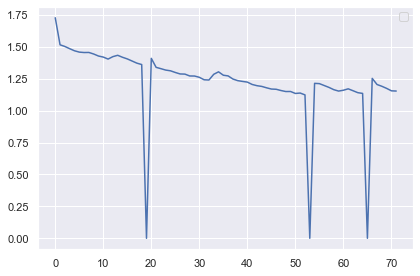

In [7]:
plt.plot(np.arange(72),discharge['capacity'])
plt.tight_layout()
plt.legend()


In [8]:
list_cols = {'voltage_load','temp_battery','time_min','time_sec','voltage_battery','current_load','current_battery'}
other_cols = list(set(charge.columns) - set(list_cols))
exploded = [charge[col].explode() for col in list_cols]
df1 = pd.DataFrame(dict(zip(list_cols, exploded)))
df1 = charge[other_cols].merge(df1, how="right", left_index=True, right_index=True)
df1.drop(['date_time','amb_temp'],axis=1,inplace=True)
df1=df1.astype(float)
df1.sort_values('cycle')
df1=df1[df1['voltage_battery']>4.2].groupby('cycle')
Charging_max_Threshold_voltage_time=df1.min()['time_sec']


In [9]:
list_cols = {'voltage_load','temp_battery','time_min','time_sec','voltage_battery','current_load','current_battery'}
other_cols = list(set(discharge.columns) - set(list_cols))
exploded = [discharge[col].explode() for col in list_cols]
df2 = pd.DataFrame(dict(zip(list_cols, exploded)))
df2 = discharge[other_cols].merge(df2, how="right", left_index=True, right_index=True)
df2.drop(['date_time','amb_temp'],axis=1,inplace=True)
df2
df2=df2.astype(float)

In [10]:
#df2[df2['capacity']==0]
#df2.drop(df2[df2['capacity']==0.00].index,inplace=True)
df=df2[df2['voltage_battery']<2.2]

df=df.sort_values('cycle')
print(df)

         deltaV  capacity  time_taken       auc  cycle  current_load  \
0     17.714173  1.728239  107.269017 -2.251653    1.0        0.9990   
4    118.855402  1.516149   94.171083 -1.960786    2.0        0.9988   
6     30.147288  1.503121   93.181783 -1.908278    3.0        0.9986   
8     18.061338  1.485866   92.393500 -1.913040    4.0        0.9986   
10    63.921138  1.469456   91.650767 -1.869823    5.0        0.9988   
..          ...       ...         ...       ...    ...           ...   
172   34.796111  1.205045   77.731783 -1.473988   68.0        0.9988   
174   81.479430  1.191199   76.355467 -1.444842   69.0        0.9988   
176   82.864442  1.174638   75.883850 -1.480358   70.0        0.9988   
178  152.945807  1.155543   74.775000 -1.405899   71.0        0.9988   
180   11.379093  1.153804   74.177083 -1.401955   72.0        0.9988   

     voltage_battery    time_min  current_battery  voltage_load  time_sec  \
0           2.179300  107.269017        -1.003137         

In [11]:
#discharge['energy']=discharge['energy'].ewm(alpha=0.1).mean()
Discharge_min_Threshold_voltage_time=df['time_sec']
Discharge_min_Threshold_voltage_time

0      6436.141
4      5650.265
6      5590.907
8      5543.610
10     5499.046
         ...   
172    4663.907
174    4581.328
176    4553.031
178    4486.500
180    4450.625
Name: time_sec, Length: 69, dtype: float64

In [12]:
cycle,energy,max_temp_char,max_temp_dis,int_res,cap,time_discharge,time_charge=[],[],[],[],[],[],[],[]
dis_vol,dis_cur,rated_cap=[],[],[]

In [13]:
for i in range(72):
    cycle.append(discharge['cycle'][i])
    #energy.append(discharge['energy'][i])
    max_temp_char.append(max(charge['temp_battery'][i]))
    max_temp_dis.append(max(discharge['temp_battery'][i]))
    #int_res.append(discharge['internal_resistance'][i])
    cap.append(discharge['capacity'][i])
    time_discharge.append(discharge['time_taken'][i])
    time_charge.append(charge['time_taken'][i])
    #soh.append((outlier[i]/outlier[0])*100)
    dis_vol.append(2.5)
    dis_cur.append(1)
    
    
    
dic={"cycle":cycle, 'max_distemp':max_temp_dis, 'max_chtemp':max_temp_char,  'capacity':cap,'dis_time':time_discharge,'chr_time':time_charge,'Discharge_voltage':dis_vol,'Discharge_current':dis_cur}
#dic

In [14]:
soh_df = pd.DataFrame(dic)

In [15]:
soh_df=soh_df.dropna()

In [16]:
soh_df.drop(['capacity'],axis=1).corr()

,cycle,max_distemp,max_chtemp,dis_time,chr_time,Discharge_voltage,Discharge_current
cycle,1.000000,0.326576,0.091197,-0.638384,0.267253,NaN,NaN
max_distemp,0.326576,1.000000,0.349840,0.378531,0.118625,NaN,NaN
max_chtemp,0.091197,0.349840,1.000000,0.128439,0.076530,NaN,NaN
dis_time,-0.638384,0.378531,0.128439,1.000000,-0.057801,NaN,NaN
chr_time,0.267253,0.118625,0.076530,-0.057801,1.000000,NaN,NaN
Discharge_voltage,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Discharge_current,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

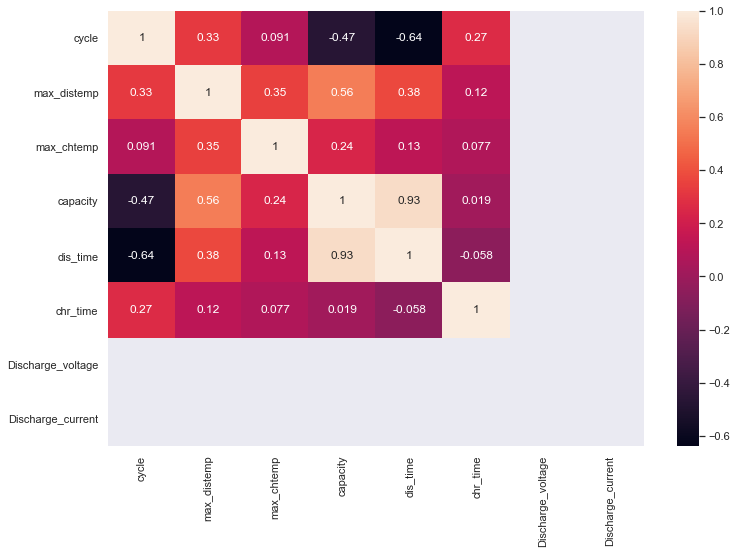

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(soh_df.corr(),annot=True)

In [18]:
soh_df=soh_df[soh_df['capacity']!=0]

In [19]:
def correlation(dataset, threshold):
    col_corr = set()  #The names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # for getting absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of columns
                col_corr.add(colname)
    return col_corr
col=correlation(soh_df.drop(['capacity'],axis=1),0.9)

r2 score 0.7835532646453683
r2 score train 0.7960076312079688
mean square error 0.0033578131417854734
mean absolute error 0.049167553250280174


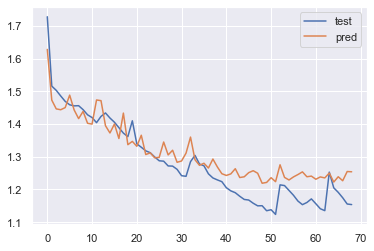

In [20]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.svm import SVR
#from sklearn.model_selection import GridSearchCV
x=soh_df.drop(['capacity'],axis=1)
y=soh_df['capacity']
minmax=MinMaxScaler()
sd=StandardScaler()
x=minmax.fit_transform(x)
#x=sd.fit_transform(x)
x.shape
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=32)
svr=SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x)
y_pred1=svr.predict(x_train)
print('r2 score',r2_score(y,y_pred))
print('r2 score train',r2_score(y_train,y_pred1))
print('mean square error',mean_squared_error(y,y_pred))
print('mean absolute error',mean_absolute_error(y,y_pred))
plt.plot(list(y))
plt.plot(list(y_pred))
plt.legend(labels=['test','pred'])

In [21]:
#Discharge_min_Threshold_voltage_time=pd.DataFrame(Discharge_min_Threshold_voltage_time)
index=np.arange(69)
soh_df.set_index(index)
#Discharge_min_Threshold_voltage_time.set_index(index)

,cycle,max_distemp,max_chtemp,capacity,dis_time,chr_time,Discharge_voltage,Discharge_current
0,1,13.880081,9.325138,1.728239,107.269017,180.055217,2.5,1
1,2,12.941526,12.346120,1.516149,94.171083,180.034633,2.5,1
2,3,13.359691,11.598067,1.503121,93.181783,180.128133,2.5,1
3,4,12.683911,12.092569,1.485866,92.393500,180.094783,2.5,1
4,5,13.065400,12.490739,1.469456,91.650767,180.067967,2.5,1
...,...,...,...,...,...,...,...,...
64,68,14.454392,13.574847,1.205045,77.731783,180.132817,2.5,1
65,69,14.172939,13.649784,1.191199,76.355467,180.159900,2.5,1
66,70,14.797844,13.486367,1.174638,75.883850,180.068483,2.5,1
67,71,14.868149,14.316772,1.155543,74.775000,180.172400,2.5,1


In [22]:
soh_df['Discharge_min_Threshold_voltage_time']=Discharge_min_Threshold_voltage_time[:69].tolist()
soh_df['Charging_max_Threshold_voltage_time']=Charging_max_Threshold_voltage_time[:69].tolist()
soh_df['soh']=soh_df['capacity']/soh_df['capacity'].max()
soh_df['RUL']=72-soh_df['cycle']

In [23]:
soh_df

,cycle,max_distemp,max_chtemp,capacity,dis_time,chr_time,Discharge_voltage,Discharge_current,Discharge_min_Threshold_voltage_time,Charging_max_Threshold_voltage_time,soh,RUL
0,1,13.880081,9.325138,1.728239,107.269017,180.055217,2.5,1,6436.141,1427.625,1.000000,71
1,2,12.941526,12.346120,1.516149,94.171083,180.034633,2.5,1,5650.265,1351.484,0.877279,70
2,3,13.359691,11.598067,1.503121,93.181783,180.128133,2.5,1,5590.907,1304.875,0.869741,69
3,4,12.683911,12.092569,1.485866,92.393500,180.094783,2.5,1,5543.610,1220.953,0.859757,68
4,5,13.065400,12.490739,1.469456,91.650767,180.067967,2.5,1,5499.046,1202.719,0.850262,67
...,...,...,...,...,...,...,...,...,...,...,...,...
67,68,14.454392,13.574847,1.205045,77.731783,180.132817,2.5,1,4663.907,548.765,0.697268,4
68,69,14.172939,13.649784,1.191199,76.355467,180.159900,2.5,1,4581.328,95.172,0.689256,3
69,70,14.797844,13.486367,1.174638,75.883850,180.068483,2.5,1,4553.031,478.156,0.679673,2
70,71,14.868149,14.316772,1.155543,74.775000,180.172400,2.5,1,4486.500,677.735,0.668625,1


<AxesSubplot:>

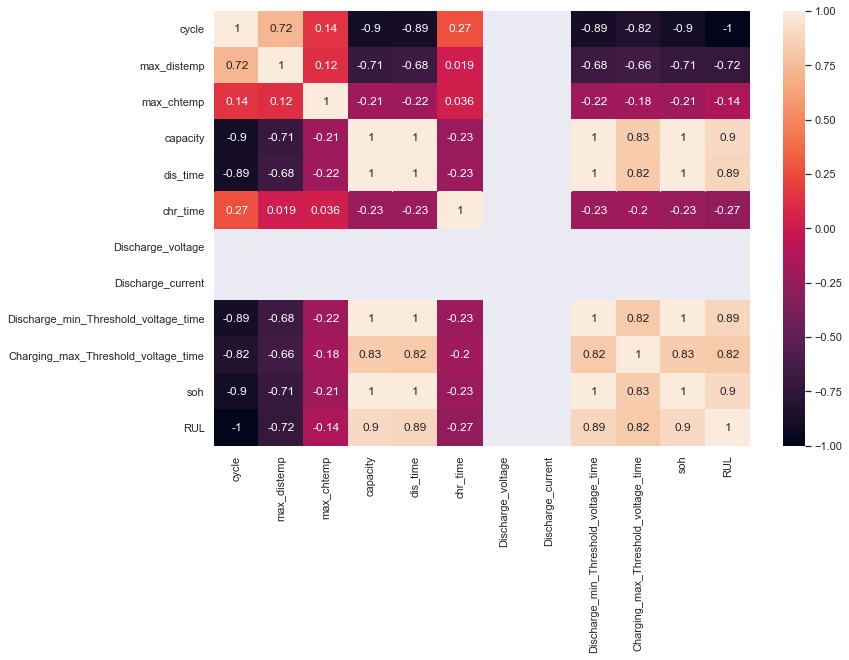

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(soh_df.corr(),annot=True)

## Visualizing Features for capacity prediction

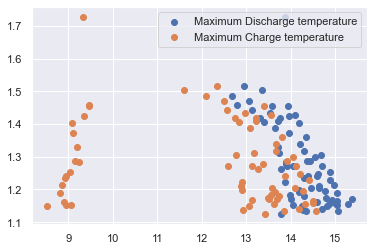

In [25]:
plt.scatter(soh_df['max_distemp'],soh_df['capacity'])
plt.scatter(soh_df['max_chtemp'],soh_df['capacity'])
plt.legend(labels=['Maximum Discharge temperature','Maximum Charge temperature'])

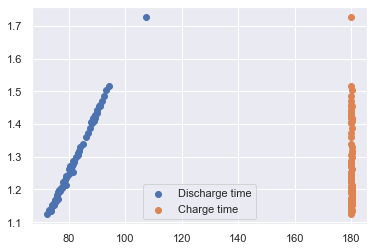

In [26]:
plt.scatter(soh_df['dis_time'],soh_df['capacity'])
plt.scatter(soh_df['chr_time'],soh_df['capacity'])
plt.legend(labels=['Discharge time','Charge time'])

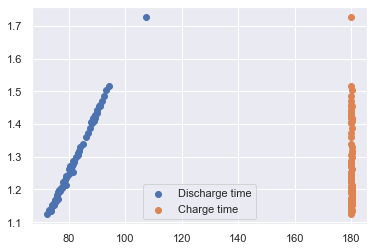

In [27]:
plt.scatter(soh_df['dis_time'],soh_df['capacity'])
plt.scatter(soh_df['chr_time'],soh_df['capacity'])
plt.legend(labels=['Discharge time','Charge time'])

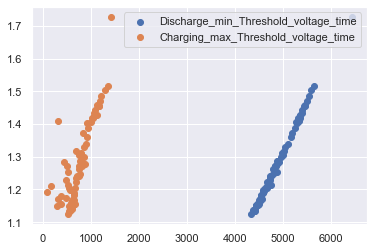

In [28]:
plt.scatter(soh_df['Discharge_min_Threshold_voltage_time'],soh_df['capacity'])
plt.scatter(soh_df['Charging_max_Threshold_voltage_time'],soh_df['capacity'])
plt.legend(labels=['Discharge_min_Threshold_voltage_time','Charging_max_Threshold_voltage_time'])

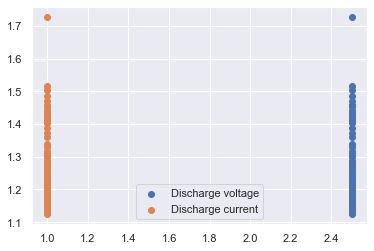

In [29]:

plt.scatter(soh_df['Discharge_voltage'],soh_df['capacity'])
plt.scatter(soh_df['Discharge_current'],soh_df['capacity'])
plt.legend(labels=['Discharge voltage','Discharge current'])

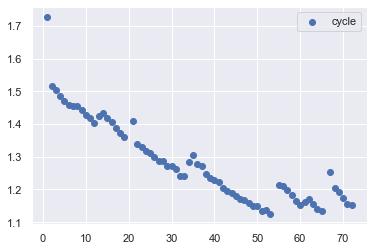

In [30]:
plt.scatter(soh_df['cycle'],soh_df['capacity'])
plt.legend(labels=['cycle'])

i believe Charging_max_Threshold_voltage_time(Sec) and Discharge_min_Threshold_voltage_time(Sec) both feature gives exact time taken for voltage to attain 4.2 max threshold while charging and gives exact time taken for voltage to attain 2.5 voltage drop threshold while discharging respectively which gives more detailed estimation for capacity.\
Charging_max_Threshold_voltage_time(Sec) and Discharge_min_Threshold_voltage_time(Sec) both feature are highly correlated since one feature is enough and r2 score only differ by .03 percentage after adding these features but it gives us detailed view of charging discharging estimation towards voltage feature vs time.

In [31]:
soh_df.to_csv('data.csv')

Features     - accuracy
distime
max
cycle
dis
constant
total   

In [32]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.svm import SVR

In [33]:
x=soh_df.drop(['capacity','dis_time','chr_time','cycle','max_chtemp','max_distemp','soh','Discharge_voltage','Discharge_current',"RUL"],axis=1)
y=soh_df['soh']
print(x.columns)
minmax=MinMaxScaler()
sd=StandardScaler()
x=minmax.fit_transform(x)

#x=sd.fit_transform(x)
#x.columns

Index(['Discharge_min_Threshold_voltage_time', 'Charging_max_Threshold_voltage_time'], dtype='object')


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=32)

In [35]:
from sklearn.linear_model import LinearRegression
from math import sqrt

# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y_train)



LinearRegression()

In [36]:
y_pred=lin_reg_2.predict(poly_reg.transform(x))
y_pred1=lin_reg_2.predict(poly_reg.transform(x_train))
y_pred.shape

(69,)

In [37]:
print('r2 score train',r2_score(y_train,y_pred1))
print('r2 score test',r2_score(y,y_pred))
print('Root mean square error',sqrt(mean_squared_error(y,y_pred)))
print('mean absolute error',mean_absolute_error(y,y_pred))

r2 score train 0.9984260175142214
r2 score test 0.9980478953255226
Root mean square error 0.0031842006989559165
mean absolute error 0.00239270731079238


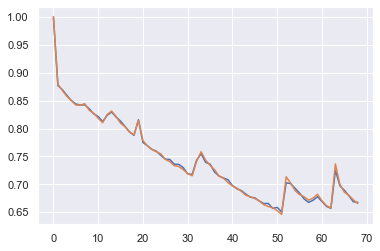

In [38]:
plt.plot(list(y))
plt.plot(list(y_pred))

In [39]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred=lin_reg.predict(x)
y_pred1=lin_reg.predict(x_train)

In [40]:
print('r2 score',r2_score(y,y_pred))
print('r2 score train',r2_score(y_train,y_pred1))
print('Root mean square error',sqrt(mean_squared_error(y,y_pred)))
print('mean absolute error',mean_absolute_error(y,y_pred))


r2 score 0.9974745115806948
r2 score train 0.9979888244351284
Root mean square error 0.003621775890049055
mean absolute error 0.0027482256632574862


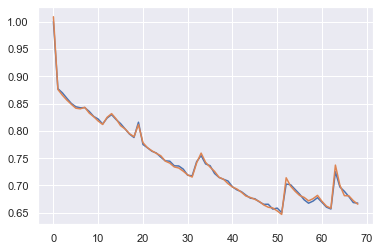

In [41]:
plt.plot(list(y))
plt.plot(list(y_pred))

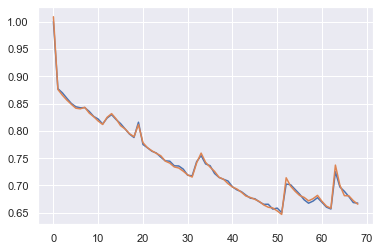

In [42]:
plt.plot(list(y))
plt.plot(list(y_pred))

In [43]:
from sklearn.linear_model import LinearRegression,Ridge,BayesianRidge,Lasso,ElasticNet


# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y_train)


LinearRegression()

In [44]:
y_pred=lin_reg_2.predict(poly_reg.transform(x))
y_pred1=lin_reg_2.predict(poly_reg.transform(x_train))
y_pred.shape

(69,)

In [45]:
print('r2 score train',r2_score(y_train,y_pred1))
print('r2 score test',r2_score(y,y_pred))
print('Root mean square error',sqrt(mean_squared_error(y,y_pred)))
print('mean absolute error',mean_absolute_error(y,y_pred))

r2 score train 0.9984260175142214
r2 score test 0.9980478953255226
Root mean square error 0.0031842006989559165
mean absolute error 0.00239270731079238


[1.34752641]


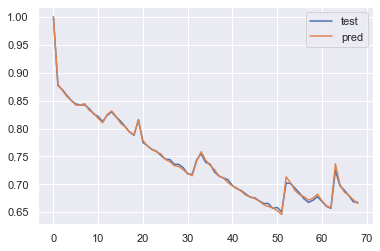

In [46]:
plt.plot(list(y))
plt.plot(list(y_pred))
plt.legend(labels=['test','pred'])
pred = lin_reg_2.predict(poly_reg.transform(minmax.transform([[8499.046,2702.719]])))
print(pred)


r2 score 0.9821929833863066
r2 score train 0.9829230067621351
Root mean square error 0.009617107366451797
mean absolute error 0.007512229935191562
[1.31078635]


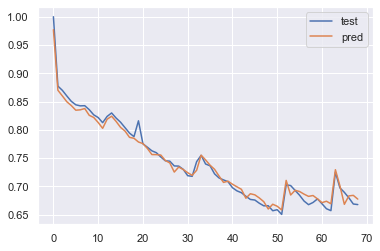

In [47]:
svr=SVR(kernel='linear',degree=2,C=0.1,epsilon=0.01)
svr.fit(x_train,y_train)
y_pred=svr.predict(x)
y_pred1=svr.predict(x_train)
print('r2 score',r2_score(y,y_pred))
print('r2 score train',r2_score(y_train,y_pred1))
print('Root mean square error',sqrt(mean_squared_error(y,y_pred)))
print('mean absolute error',mean_absolute_error(y,y_pred))
plt.plot(list(y))
plt.plot(list(y_pred))
plt.legend(labels=['test','pred'])
pred = svr.predict(minmax.transform([[8499.046,2702.719]]))
print(pred)

r2 score 0.9955508015785062
r2 score train 0.9959561220433208
Root mean square error 0.004807173200602116
mean absolute error 0.003947851947317411
[1.34624612]


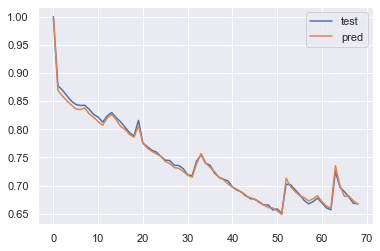

In [48]:
svr=SVR(C= 10, gamma= 0.0001, kernel= 'linear',epsilon = 0.01)
svr.fit(x_train,y_train)
y_pred=svr.predict(x)
y_pred1=svr.predict(x_train)
print('r2 score',r2_score(y,y_pred))
print('r2 score train',r2_score(y_train,y_pred1))
print('Root mean square error',sqrt(mean_squared_error(y,y_pred)))
print('mean absolute error',mean_absolute_error(y,y_pred))
plt.plot(list(y))
plt.plot(list(y_pred))
plt.legend(labels=['test','pred'])
pred = svr.predict(minmax.transform([[8499.046,2702.719]]))
print(pred)

r2 score 0.9280012765935485
r2 score train 0.928723406959355
Root mean square error 0.01933798774620603
mean absolute error 0.01555365822611568


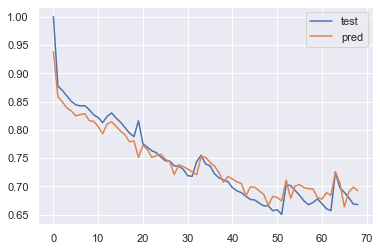

In [49]:
svr=Ridge()
svr.fit(x_train,y_train)
y_pred=svr.predict(x)
y_pred1=svr.predict(x_train)
print('r2 score',r2_score(y,y_pred))
print('r2 score train',r2_score(y_train,y_pred1))
print('Root mean square error',sqrt(mean_squared_error(y,y_pred)))
print('mean absolute error',mean_absolute_error(y,y_pred))
plt.plot(list(y))
plt.plot(list(y_pred))
plt.legend(labels=['test','pred'])

# RUL

In [50]:
soh_df.set_index([np.arange(69)])

,cycle,max_distemp,max_chtemp,capacity,dis_time,chr_time,Discharge_voltage,Discharge_current,Discharge_min_Threshold_voltage_time,Charging_max_Threshold_voltage_time,soh,RUL
0,1,13.880081,9.325138,1.728239,107.269017,180.055217,2.5,1,6436.141,1427.625,1.000000,71
1,2,12.941526,12.346120,1.516149,94.171083,180.034633,2.5,1,5650.265,1351.484,0.877279,70
2,3,13.359691,11.598067,1.503121,93.181783,180.128133,2.5,1,5590.907,1304.875,0.869741,69
3,4,12.683911,12.092569,1.485866,92.393500,180.094783,2.5,1,5543.610,1220.953,0.859757,68
4,5,13.065400,12.490739,1.469456,91.650767,180.067967,2.5,1,5499.046,1202.719,0.850262,67
...,...,...,...,...,...,...,...,...,...,...,...,...
64,68,14.454392,13.574847,1.205045,77.731783,180.132817,2.5,1,4663.907,548.765,0.697268,4
65,69,14.172939,13.649784,1.191199,76.355467,180.159900,2.5,1,4581.328,95.172,0.689256,3
66,70,14.797844,13.486367,1.174638,75.883850,180.068483,2.5,1,4553.031,478.156,0.679673,2
67,71,14.868149,14.316772,1.155543,74.775000,180.172400,2.5,1,4486.500,677.735,0.668625,1


Train r2 score 0.8998313198051837
Test r2 score 0.7939531379414513
R2 score 0.8509796174988952
Root mean square error 8.000302077948735
mean absolute error 6.196367128165051


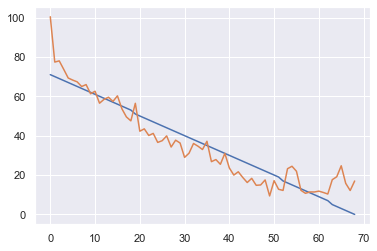

In [51]:
lr=LinearRegression()
x=soh_df[['Discharge_min_Threshold_voltage_time','Charging_max_Threshold_voltage_time','soh']]
y=soh_df['RUL']
#x=x.values.reshape(-1,1)
y=y.values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=32)
lr.fit(x_train,y_train)
y_ptrain=lr.predict(x_train)
y_ptest=lr.predict(x_test)
y_pred=lr.predict(x)
print('Train r2 score',r2_score(y_train,y_ptrain))
print('Test r2 score',r2_score(y_test,y_ptest))
print('R2 score',r2_score(y,y_pred))
print('Root mean square error',sqrt(mean_squared_error(y,y_pred)))
print('mean absolute error',mean_absolute_error(y,y_pred))
plt.plot(y)
plt.plot(y_pred)


Train r2 score 0.9396100839584434
Test r2 score 0.6791676889000762
R2 score 0.8988387955474056
Root mean square error 6.591595436489932
mean absolute error 4.442995733473573
[[-252.61793719]]


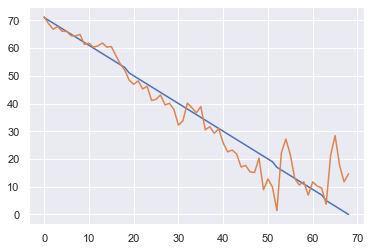

In [52]:
poly_reg = PolynomialFeatures(degree = 2)

x1=x
lr=LinearRegression()
x=soh_df[['Discharge_min_Threshold_voltage_time','Charging_max_Threshold_voltage_time','soh']]
y=soh_df['RUL']
#x=x.values.reshape(-1,1)
x = poly_reg.fit_transform(x)
y=y.values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)
lr.fit(x_train,y_train)
y_ptrain=lr.predict(x_train)
y_ptest=lr.predict(x_test)
y_pred=lr.predict(x)
print('Train r2 score',r2_score(y_train,y_ptrain))
print('Test r2 score',r2_score(y_test,y_ptest))
print('R2 score',r2_score(y,y_pred))
print('Root mean square error',sqrt(mean_squared_error(y,y_pred)))
print('mean absolute error',mean_absolute_error(y,y_pred))
plt.plot(y)
plt.plot(y_pred)



pred = lr.predict(poly_reg.transform([[6499.046,1502.719,1.1]]))
print(pred)
#5499.046	1202.719	0.850262	67

0.17183284252512288
0.1495600012955901
0.17236536161325533
Root mean square error 18.853972874667864
mean absolute error 16.197060498562497


/home/hari/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


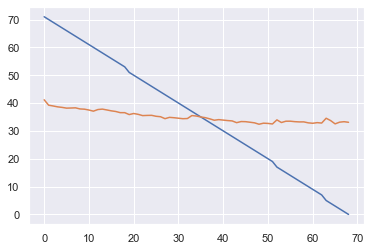

In [53]:
svr=SVR()
x=soh_df[['Discharge_min_Threshold_voltage_time','Charging_max_Threshold_voltage_time']]
y=soh_df['RUL']
#x=x.values.reshape(-1,1)
y=y.values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)
svr.fit(x_train,y_train)
y_ptrain=svr.predict(x_train)
y_ptest=svr.predict(x_test)
y_pred=svr.predict(x)
print(r2_score(y_train,y_ptrain))
print(r2_score(y_test,y_ptest))
print(r2_score(y,y_pred))
print('Root mean square error',sqrt(mean_squared_error(y,y_pred)))
print('mean absolute error',mean_absolute_error(y,y_pred))
plt.plot(y)
plt.plot(y_pred)

/home/hari/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6074699286326979
0.5631036272966387
0.591608072321542
Root mean square error 13.244089996751326
mean absolute error 10.276147454218194
[94.07366315]


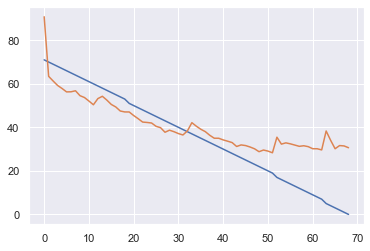

In [54]:
svr=SVR(kernel='poly')
['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
x=soh_df[['Discharge_min_Threshold_voltage_time','Charging_max_Threshold_voltage_time','soh']]
y=soh_df['RUL']
#x=x.values.reshape(-1,1)
y=y.values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=32)
svr.fit(x_train,y_train)
y_ptrain=svr.predict(x_train)
y_ptest=svr.predict(x_test)
y_pred=svr.predict(x)
print(r2_score(y_train,y_ptrain))
print(r2_score(y_test,y_ptest))
print(r2_score(y,y_pred))
print('Root mean square error',sqrt(mean_squared_error(y,y_pred)))
print('mean absolute error',mean_absolute_error(y,y_pred))
plt.plot(y)
plt.plot(y_pred)
pred = svr.predict([[6499.046,1502.719,1.1]])
print(pred)

Train r2 score 0.862938642160737
Test r2 score 0.6968549081976234
R2 score 0.7860445780525692
Root mean square error 9.586171556006965
mean absolute error 7.009061952134607


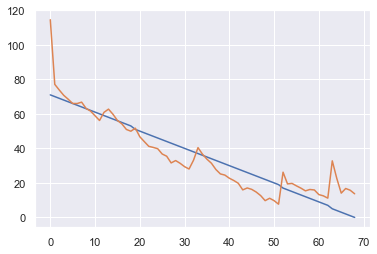

In [55]:
lr=Ridge()
x=soh_df[['Discharge_min_Threshold_voltage_time','Charging_max_Threshold_voltage_time','soh']]
y=soh_df['RUL']
#x=x.values.reshape(-1,1)
y=y.values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=32)
lr.fit(x_train,y_train)
y_ptrain=lr.predict(x_train)
y_ptest=lr.predict(x_test)
y_pred=lr.predict(x)
print('Train r2 score',r2_score(y_train,y_ptrain))
print('Test r2 score',r2_score(y_test,y_ptest))
print('R2 score',r2_score(y,y_pred))
print('Root mean square error',sqrt(mean_squared_error(y,y_pred)))
print('mean absolute error',mean_absolute_error(y,y_pred))
plt.plot(y)
plt.plot(y_pred)

Train r2 score 0.8629119365701444
Test r2 score 0.6968045705738874
R2 score 0.7860070259108836
Root mean square error 9.587012772077065
mean absolute error 7.0093710681045405


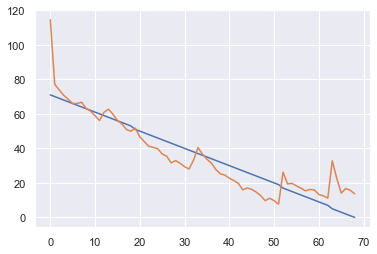

In [56]:
lr=Lasso()
x=soh_df[['Discharge_min_Threshold_voltage_time','Charging_max_Threshold_voltage_time','soh']]
y=soh_df['RUL']
#x=x.values.reshape(-1,1)
y=y.values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=32)
lr.fit(x_train,y_train)
y_ptrain=lr.predict(x_train)
y_ptest=lr.predict(x_test)
y_pred=lr.predict(x)
print('Train r2 score',r2_score(y_train,y_ptrain))
print('Test r2 score',r2_score(y_test,y_ptest))
print('R2 score',r2_score(y,y_pred))
print('Root mean square error',sqrt(mean_squared_error(y,y_pred)))
print('mean absolute error',mean_absolute_error(y,y_pred))
plt.plot(y)
plt.plot(y_pred)

Train r2 score 0.8629119652748356
Test r2 score 0.6967826581714827
R2 score 0.785996657821251
Root mean square error 9.587245017561282
mean absolute error 7.009566070393674


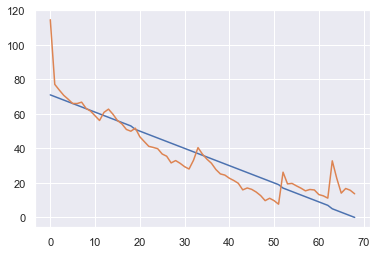

In [57]:
lr=ElasticNet()
x=soh_df[['Discharge_min_Threshold_voltage_time','Charging_max_Threshold_voltage_time','soh']]
y=soh_df['RUL']
#x=x.values.reshape(-1,1)
y=y.values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=32)
lr.fit(x_train,y_train)
y_ptrain=lr.predict(x_train)
y_ptest=lr.predict(x_test)
y_pred=lr.predict(x)
print('Train r2 score',r2_score(y_train,y_ptrain))
print('Test r2 score',r2_score(y_test,y_ptest))
print('R2 score',r2_score(y,y_pred))
print('Root mean square error',sqrt(mean_squared_error(y,y_pred)))
print('mean absolute error',mean_absolute_error(y,y_pred))
plt.plot(y)
plt.plot(y_pred)

In [58]:
#plt.plot(soh_df['cycle'],soh_df['soh'],color='red',linestyle='-')
#plt.show()
#plt.plot(soh_df['cycle'],soh_df['soh_pred'],color='blue',linestyle='--')

#plt.plot([0.,max(df["cycle"])], [.75, .75],color="red",label="threshold")

In [59]:
'''pred=0
av=0
pv=0
a=list(soh_df['soh'])
b=list(soh_df['soh_pred'])
#print(len(a))
j=0
k=0

#print(a)
for i in range(len(a)):
    actual=a[i]
    
    if actual<=0.70:
        j=i
        av=j
        break
for i in range(len(a)):
    pred=b[i]
    if pred< 0.70:
        k=i
        pv=k
        break
print("The Actual fail at cycle number: "+ str(av))
print("The prediction fail at cycle number: "+ str(pv))
RULerror=pv-av
print("The error of RUL= "+ str(RULerror)+ " Cycle(s)")'''

'pred=0\nav=0\npv=0\na=list(soh_df[\'soh\'])\nb=list(soh_df[\'soh_pred\'])\n#print(len(a))\nj=0\nk=0\n\n#print(a)\nfor i in range(len(a)):\n    actual=a[i]\n    \n    if actual<=0.70:\n        j=i\n        av=j\n        break\nfor i in range(len(a)):\n    pred=b[i]\n    if pred< 0.70:\n        k=i\n        pv=k\n        break\nprint("The Actual fail at cycle number: "+ str(av))\nprint("The prediction fail at cycle number: "+ str(pv))\nRULerror=pv-av\nprint("The error of RUL= "+ str(RULerror)+ " Cycle(s)")'